# Homework 2

- **Authors**: Michal Spano, Dana Ghafour Fatulla
- **Group no.**: `28`
- **Description**: Source code in the form of a `JupyterNotebook` for **Homework 2** of Summer Course `NUMA0` @ **Lund University, Sweden**.

## Interval Analysis

The class `Interval` with **two real numbers** (i.e. `float`s) as the endpoints is implemented with the **methods** (described in the assignment) in the following code block. Additionally, in tasks 3, 4, 8, and 9 we **test** the implemented functionality.

From a mathematical perspective, $I = [a, b]$ with $a, b \in \mathbb{R}$ implies that

$$
I = \{x \mid a \leq x \leq b\}
$$

Suppose two intervals $I_1 = [a, b], I_2 = [c, d]$. We define the four basic arithemtic operators on these rules:

$$I_1 + I_2 = [a + c, b + d]$$
$$I_1 - I_2 = [a - d, b - c]$$
$$I_1 \ast I_2 = [\min(ac, ad, bc, bd), \max(ac, ad, bc, bd)]$$
$$I_1 \div I_2 = [\min(a / c, a / d, b / c, b / d), \max(a / c, a / d, b / c, b / d)], 0 \notin [c, d]$$

We further extend the implementation to support binary operations between an interval and any real number $r$, say $I + r$, $I \ast r$. Similarly, we ensure that addition and multiplication are **commutative**, whilst subtraction is not (and the result is dependant on the order of the terms). That is

$$I_1 + I_2 = I_2 + I_1$$
$$I_1 \ast I_2 = I_2 \ast I_1$$
$$I_1 - I_2 \neq I_2 - I_1$$

Furthermore, we define how to **negate** an interval, assuming $I_1 = [a, b]$, we have

$$- I_1 = [-b, -a]$$

Lastly, the power function $I \mapsto I^n$ with $n > 0$ is defined. Whenever $n$ is odd, we take $[a,b]^n = [a^n, b^n]$. On the other hand, we have to distinguist these three cases:

1. $a \geq 0$: $[a^n, b^n]$,
2. $b < 0$: $[b^n, a^n]$,
3. otherwise: $[0, \max(a^n, b^n)]$.

*Note*: a degenerate interval $[r, r]$ given one real number $r$ can be invoked as `Interval(r)`.

In [5]:
from numpy import inf

class Interval:
    # Definition of an interval (see above)
    def __init__(self, left: float, right: float = None):
        # [a, b], a > b cannot exist
        if left > right:
            raise ValueError("Left endpoint cannot be greater than the right endpoint")
        # A degenerate interval (only one real value; first positional argument)
        elif right == None:
            self.left, self.right = left, left
        # A closed interval
        else:
            self.left, self.right = left, right
    
    # =*= Interval Addition =*=
    def add_interval(self, obj: any):
        if isinstance(obj, (int, float)): # Ruleset for real numbers
            return Interval(self.left + obj, self.right + obj)
        elif isinstance(obj, Interval):   # Ruleset for other intervals
            return Interval(self.left + obj.left, self.right + obj.right)
        else:                             # Not supported
            raise TypeError(f"{type(obj).__name__} cannot be added to type {self.__class__.__name__}.")
    
    # Call the helper function on the magic methods (in both orders)
    def __add__(self, obj: any):
        return self.add_interval(obj)

    def __radd__(self, obj: any):
        return self.add_interval(obj)
    
    # =*= Interval Subtraction =*=
    def sub_interval(self, obj: any, reverse: bool = False):
        if isinstance(obj, (int, float)): # Ruleset for real numbers,
            if not reverse:               # when I - r,
                return Interval(self.left - obj, self.right - obj)
            else:                         # otherwise r - I.
                return Interval(obj - self.right, obj - self.left)
        elif isinstance(obj, Interval):  # Ruleset for other intervals,
            if not reverse:              # when I_1 - I_2,
                return Interval(self.left - obj.right, self.right - obj.left)
            else:                        # otherwise I_2 - I_1.
                return Interval(obj.left - self.right, obj.right - self.left)
        else:                            # Not supported
            raise TypeError(f"{type(obj).__name__} cannot be subtracted from type {self.__class__.__name__}.")
            
    # Call the helper function on the magic methods (in both orders)
    def __sub__(self, obj: any):
        return self.sub_interval(obj)

    def __rsub__(self, obj: any):
        return self.sub_interval(obj, reverse=True)
    
    # =*= Interval Multiplication =*=
    def mul_interval(self, obj: any):
        if isinstance(obj, (int, float)): # Ruleset for real numbers
            return Interval(self.left * obj, self.right * obj)
        elif isinstance(obj, Interval):   # Ruleset for other intervals
            a, b, c, d = self.left, self.right, obj.left, obj.right # readability...
            return Interval(min(a * c, a * d, b * c, b * d), max(a * c, a * d, b * c, b * d))
        else:                             # Not supported
            raise TypeError(f"{type(obj).__name__} cannot be multiplied by type {self.__class__.__name__}.")
        
    # Call the helper function on the magic methods (in both orders)
    def __mul__(self, obj: any):
        return self.mul_interval(obj)

    def __rmul__(self, obj: any):
        return self.mul_interval(obj)
    
    # =*= Interval Division =*=
    def __truediv__(self, i2):
        a, b, c, d = self.left, self.right, i2.left, i2.right # readability...
        # Zero division (Error)
        if c <= 0 <= d:
            raise ZeroDivisionError("Zero division encountered.")
        
        # Apply the formula (see above)
        result = Interval(min(a / c, a / d, b / c, b / d), max(a / c, a / d, b / c, b / d))
        
        # Infinitely large interval on either side (Error)
        if result.left == inf or result.right == inf:
            raise ValueError("Infinitely large intervals disallowed.")
        
        return result
    
    # =*= Interval Negation =*=
    def __neg__(self):
        return Interval(-self.right, -self.left)
    
    # =*= `toString` Method =*=
    def __str__(self) -> str:
        return f"[{self.left}, {self.right}]"
    
    # =*= `contains` Method =*=
    def __contains__(self, x: float) -> bool:
        return self.left <= x <= self.right
    
    # =*= power function =*=
    def __pow__(self, n: float):
        a, b = self.left, self.right # readability...
        if n <= 0:
            raise ValueError("The power must be a natural number")
        if n % 2 != 0: # is odd
            return Interval(a ** n, b ** n)
        else:          # is even
            if a >= 0:
                # 1st case
                return Interval(a ** n, b ** n)
            elif b < 0:
                # 2nd case
                return Interval(b ** n, a ** n)
            # Otherwise, all other cases
            else:
                return Interval(0, max(a ** n, b ** n))

## Tasks 3, 4

In this task, the initial functionality of the `Interval` class is verified. The results are being printed out and checked with the help of **assertions** to ensure the correctness of the them. If and only if all results are correct, a message `All assertions passed successfully` is displayed.

In [2]:
# Task 3 (test)
i = Interval(1, 2)
print(i) # print
assert i.__str__() == "[1, 2]" # example from the homework (assertion)

# Task 4 (tests)
I1 = Interval(1, 4)          # [1, 4]
I2 = Interval(-2, -1)        # [-2, -1]

print(add_result := I1 + I2) # [-1, 3]
print(sub_result := I1 - I2) # [2, 6]
print(mul_result := I1 * I2) # [-8, -1]
print(div_result := I1 / I2) # [-4, -0.5]

# Assertions (based on the examples)
assert add_result.__str__() == "[-1, 3]"
assert sub_result.__str__() == "[2, 6]"
assert mul_result.__str__() == "[-8, -1]"
assert div_result.__str__() == "[-4.0, -0.5]"

print("\nAll assertions passed successfully.")

[1, 2]
[-1, 3]
[2, 6]
[-8, -1]
[-4.0, -0.5]

All assertions passed successfully.


## Tasks 8, 9

The same as **Task 4**, albeit the **updated** functionality of the `Interval` class is verified.

In [3]:
# Task 8 (tests and assertions)
I = Interval(2, 3)

# Addition
print(res := I + 1)   # [3, 4]
assert res.__str__() == "[3, 4]"
print(res := 1 + I)   # [3, 4]
assert res.__str__() == "[3, 4]"
print(res := 1.0 + I) # [3.0, 4.0]
assert res.__str__() == "[3.0, 4.0]"
print(res := I + 1.0) # [3.0, 4.0]
assert res.__str__() == "[3.0, 4.0]"

# Subtraction
print(res := 1 - I)   # [-2, -1]
assert res.__str__() == "[-2, -1]"
print(res := I - 1)   # [1, 2]
assert res.__str__() == "[1, 2]"
print(res := 1.0 - I) # [-2.0, -1.0]
assert res.__str__() == "[-2.0, -1.0]"
print(res := I - 1.0) # [1.0, 2.0]
assert res.__str__() == "[1.0, 2.0]"

# Multiplication
print(res := 1 * I)   # [2, 3]
assert res.__str__() == "[2, 3]"
print(res := I * 1)   # [2, 3]
assert res.__str__() == "[2, 3]"
print(res := 1.0 * I) # [2.0, 3.0]
assert res.__str__() == "[2.0, 3.0]"
print(res := I * 1.0) # [2.0, 3.0]
assert res.__str__() == "[2.0, 3.0]"

# Negation
print(res := -Interval(4,5)) # [-5, -4]
assert res.__str__() == "[-5, -4]"

# Task 9 (tests and assertions)
x = Interval(-2, 2)

print(x)           # [-2, 2]
print(res := x**2) # [0, 4]
assert res.__str__() == "[0, 4]"
print(res := x**3) # [-8, 8]
assert res.__str__() == "[-8, 8]"

print("\nAll assertions passed successfully.")

[3, 4]
[3, 4]
[3.0, 4.0]
[3.0, 4.0]
[-2, -1]
[1, 2]
[-2.0, -1.0]
[1.0, 2.0]
[2, 3]
[2, 3]
[2.0, 3.0]
[2.0, 3.0]
[-5, -4]
[-2, 2]
[0, 4]
[-8, 8]

All assertions passed successfully.


## Task 10 - Evaluating a Polynomial with Intervals

In this task, we have $x \in [0, 1]$ and define the upper boundary as $x + 0.5$. For each such $x$, we create an interval $I$ with $I = [x, x + 0.5]$. Then, we proceed to evaluate the following polynomial

$$p(I) = 3I^3 - 2I^2 - 5I - 1$$

Lastly, we plot the obtained lower and upper boundary values of each $I$ on $[0, 1]$.

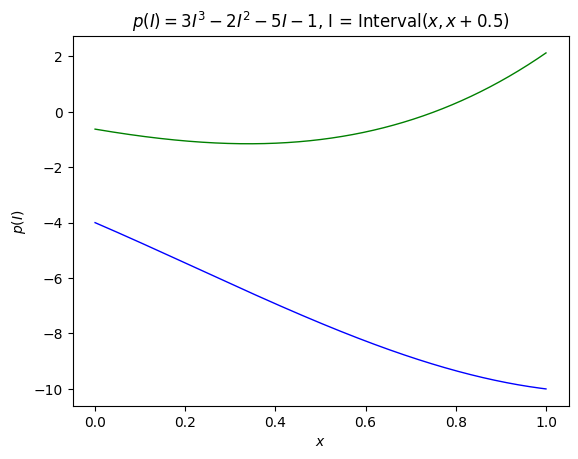

In [10]:
# Imports required for the module
from numpy import linspace
import matplotlib.pyplot as plt

x1 = linspace(0., 1, 1000)      # lower boundary values
xu = linspace(0., 1, 1000) + .5 # upper boundary values

# Buffers to store the lower and upper y values (initially, empty lists)
y1, yu = [], []
for lo, hi in zip(x1, xu): # iterate over all lower, upper x values
    I = Interval(lo, hi)   # create an interval instance
    
    # Evaluate the polynomial and store the obtained y values
    p_I = 3 * (I**3) - 2 * (I**2) - 5 * I - 1
    y1.append(p_I.left), yu.append(p_I.right)

# Plot the gathered data points, format the plot
plt.xlabel("$x$")
plt.ylabel("$p(I)$")
plt.title("$p(I) = 3I^3 - 2I^2 - 5I -1$, I = Interval($x, x + 0.5$)")
plt.plot(x1, y1, color="blue", linewidth=1)
plt.plot(x1, yu, color="green", linewidth=1)
plt.show()